In [125]:
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

We want to predict the price of an house. It is a supervised (is coming with label data ML problem). Moreover since we want to come
out with the price we will emnploy a regression algorithm, specificcaly w ill use a MultiVariate regression 

Moreover as a performance measure for our problem we will conside the RMSE

### Getting the data

In [126]:
#I load the data in panda DataFrame

df = pd.read_csv('data.csv')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [127]:
# I create a list with all the columns name
cnames = df.columns.values.tolist()

I clean up the data

In [128]:
df['price'] = df.price.astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
date             4600 non-null object
price            4600 non-null int32
bedrooms         4600 non-null float64
bathrooms        4600 non-null float64
sqft_living      4600 non-null int64
sqft_lot         4600 non-null int64
floors           4600 non-null float64
waterfront       4600 non-null int64
view             4600 non-null int64
condition        4600 non-null int64
sqft_above       4600 non-null int64
sqft_basement    4600 non-null int64
yr_built         4600 non-null int64
yr_renovated     4600 non-null int64
street           4600 non-null object
city             4600 non-null object
statezip         4600 non-null object
country          4600 non-null object
dtypes: float64(3), int32(1), int64(9), object(5)
memory usage: 629.0+ KB


I anylaze the type object attributes

In [130]:
df.date.value_counts()
df.date.max()

'2014-07-10 00:00:00'

In [13]:
df.country.value_counts()

USA    4600
Name: country, dtype: int64

All the houses are located in the USA in the Washington state and all the records have collected between
2014-05-02 and 2014-07-10. Therefore I can drop these two columns

In [14]:
df.drop("country", axis=1, inplace=True) 
df.drop("date", axis=1, inplace=True)

In [15]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609430e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [16]:
# Let's check for zero price, there are 49 houses with zero price, these values do not make any 
#sense so I  will remove them 
df.price.value_counts()
#Let's remove them
cond = df['price'] != 0
df1= df[cond]
# Moreover I also eliminate the outliers present in the distribution
df1 = df1[df1['price']!=26590000]
df1 = df1[df1['price']!=12899000]
df1 = df1[df1['price']!=7062500]
max(df1.price)

4668000

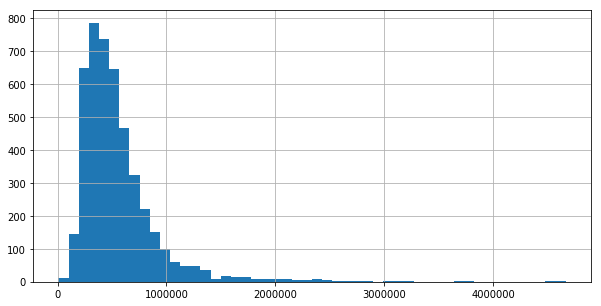

In [17]:
df1.price.hist(bins=50,figsize=(10,5))

In [ ]:
# There are also sone possible outliers

### Create a test set

In [18]:
train_set, test_set = train_test_split(df1, test_size=0.20, random_state=42)

In [86]:
train_set.shape

(3638, 16)

In [19]:
#Let's selct the train_set and let's compute the correlation matrix
housing = train_set.copy()
corr_matrix = housing.corr()
corr_matrix['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.696223
sqft_above       0.594087
bathrooms        0.523193
view             0.387520
bedrooms         0.338662
sqft_basement    0.330617
floors           0.259224
waterfront       0.181238
sqft_lot         0.075961
condition        0.055073
yr_built         0.030061
yr_renovated    -0.042744
Name: price, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D1C5B5DCC0>,
      dtype=object)

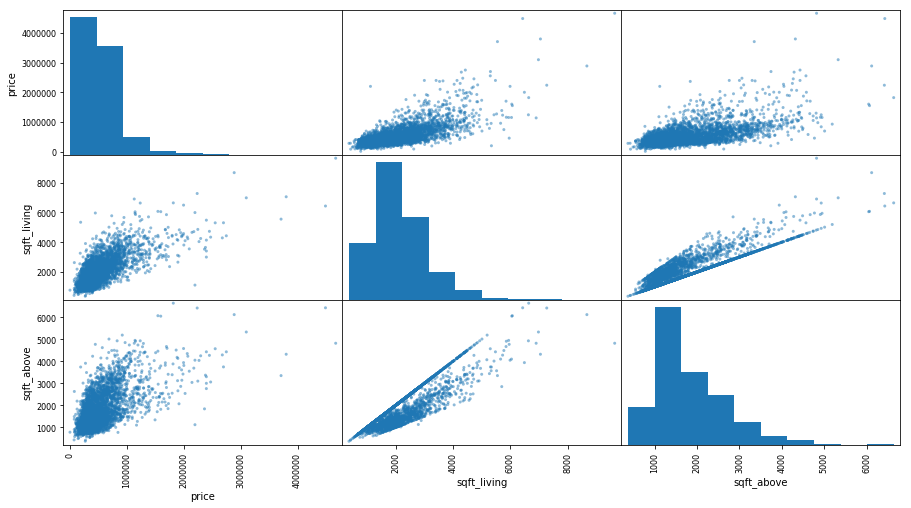

In [20]:
# Let's consider the scatter_matrix
from pandas.plotting import scatter_matrix

attributes = ['price','sqft_living','sqft_above']
scatter_matrix(housing[attributes],figsize=(15,8))


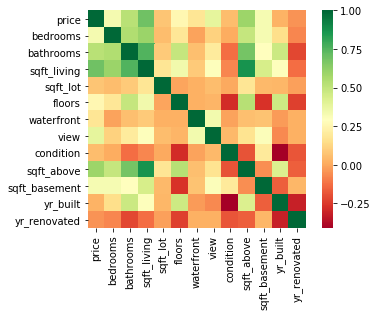

In [23]:
sns.heatmap(housing.corr(), square=True, cmap='RdYlGn')

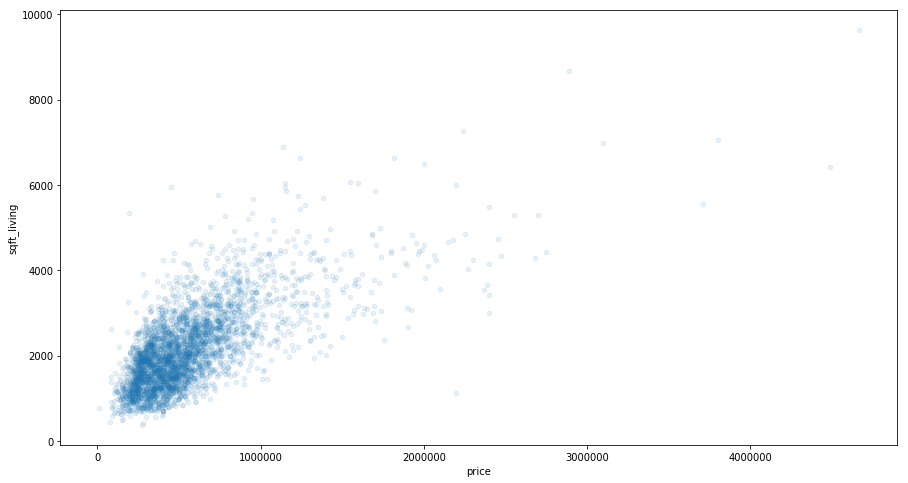

In [24]:
#Let's consider the SQFT living vs price. This is the most promising attribute
housing.plot(kind="scatter", x="price", y="sqft_living", alpha=0.1, figsize=(15,8))

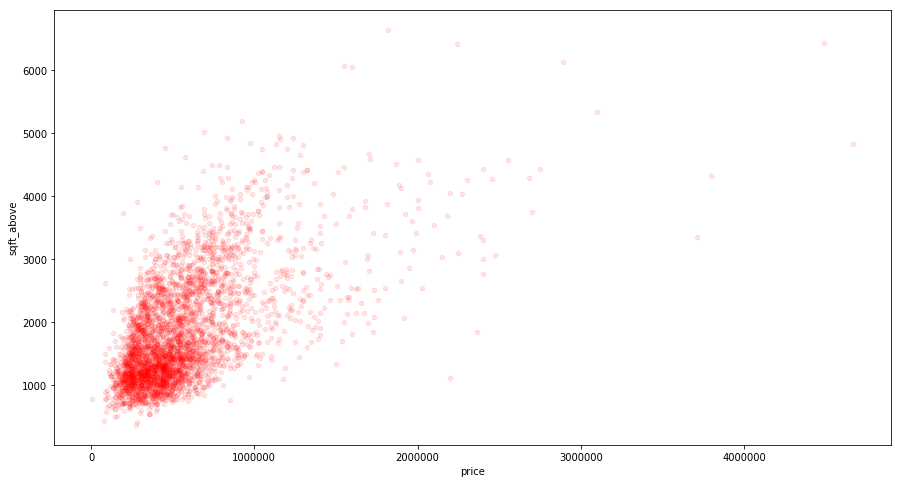

In [26]:
#Let's consider the SQFT living vs price. This is the most promising attribute
housing.plot(kind="scatter", x="price", y="sqft_above", alpha=0.1, figsize=(15,8), color ='r')

### Train the model

0.48472690253580286


Text(0.5, 1.0, 'Price vs sqft_living')

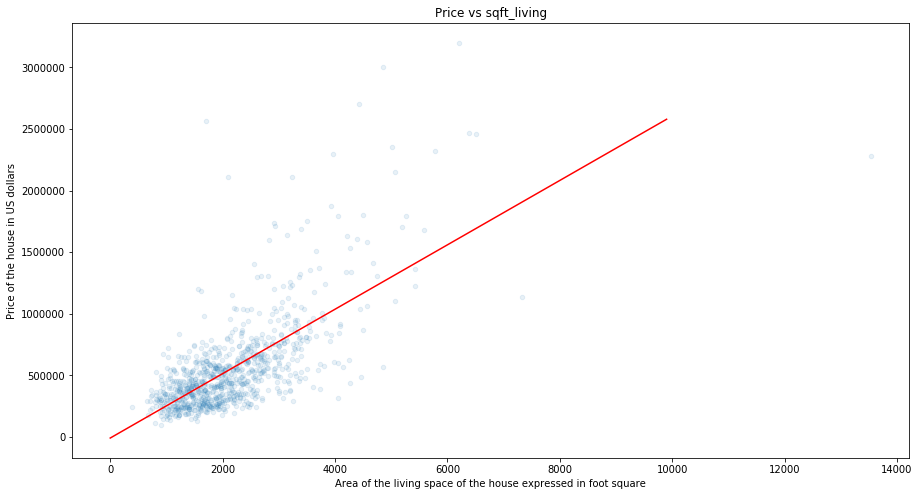

In [117]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score

# Train set
y = np.array(housing.price.values).reshape(-1,1)
x = np.array(housing.sqft_living.values).reshape(-1,1)

reg = LinearRegression()
reg.fit(x,y)



#I use the test_set prediction
Yhat = reg.predict(x_test)
lin_mse = mean_squared_error(y_test,Yhat)
lin_rmse=np.sqrt(lin_mse)

test_set.plot(kind ='scatter', x='sqft_living', y='price', alpha=0.1, figsize=(15,8))


q = reg.intercept_
m =reg.coef_

val = np.array(range(0,10000,100)).reshape(-1,1)
y_val = np.array([element*m+q for element in val]).reshape(-1,1)

#Test set
x_test = np.array(test_set.sqft_living.values).reshape(-1,1)
y_test = np.array(test_set.price.values).reshape(-1,1)


plt.plot(val, y_val, color ='r' )

plt.xlabel('Area of the living space of the house expressed in foot square')
plt.ylabel('Price of the house in US dollars')
plt.title('Price vs sqft_living')

In [120]:
#Linear correlation coefficient
print(reg.score(x,y))

0.48472690253580286


Text(0.5, 1.0, 'Price vs sqft_above')

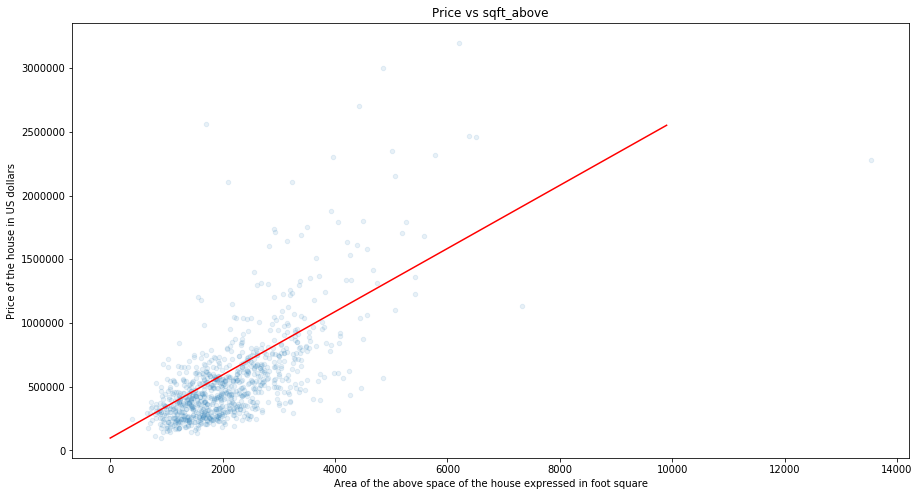

In [122]:
# sqft_above vs price

# Train set
y = np.array(housing.price.values).reshape(-1,1)
x = np.array(housing.sqft_above.values).reshape(-1,1)

reg = LinearRegression()
reg.fit(x,y)



#I use the test_set prediction
Yhat = reg.predict(x_test)
lin_mse = mean_squared_error(y_test,Yhat)
lin_rmse=np.sqrt(lin_mse)

test_set.plot(kind ='scatter', x='sqft_living', y='price', alpha=0.1, figsize=(15,8))


q = reg.intercept_
m =reg.coef_

val = np.array(range(0,10000,100)).reshape(-1,1)
y_val = np.array([element*m+q for element in val]).reshape(-1,1)

#Test set
x_test = np.array(test_set.sqft_living.values).reshape(-1,1)
y_test = np.array(test_set.price.values).reshape(-1,1)


plt.plot(val, y_val, color ='r' )

plt.xlabel('Area of the above space of the house expressed in foot square')
plt.ylabel('Price of the house in US dollars')
plt.title('Price vs sqft_above')

In [123]:
#Linear correlation coefficient
print(reg.score(x,y))

0.3529398584020477
